# NRL Match Statistics 2013-2016

## Description
* Multiple Excel spreadsheets have been imported and merged
* Data has been cleaned/manipulated so that 'scoresnetsummary' contains the home teams net score (home score - away score) and all match statitics represented as the home team's net statistics.
* Summary statsictics, correlations and a scatter matrix were observed.
* Multiple statistics were highly correlated with HomeScore and with each other.
* A handful of these where then picked out to run a RANSAC regression, with an effort to leave out the statistics that may lead to multicollinearity (such as hitups and possession).

In [1]:
import pandas

## Scores data

In [2]:
scores13=pandas.read_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllScores2013.csv',
                        index_col='MatchID')
scores14=pandas.read_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllScores2014.csv',
                        index_col='MatchID')
scores15=pandas.read_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllScores2015.csv',
                        index_col='MatchID')
scores16=pandas.read_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllScores2016.csv',
                        index_col='MatchID')

In [3]:
scores = pandas.concat([scores13,scores14,scores15,scores16])
scores

,Unnamed: 0,Home,HomeScore,Away,AwayScore
MatchID,,,,,
25277,1,Sydney Roosters,26,Manly,18
25159,2,South Sydney,20,Manly,30
25181,3,Sydney Roosters,40,Newcastle,14
25045,4,Manly,24,Cronulla,18
25070,5,Melbourne,16,Newcastle,18
24751,6,South Sydney,20,Melbourne,10
24749,7,Cronulla,20,North Queensland,18
24744,8,Sydney Roosters,4,Manly,0
24750,9,Canterbury-Bankstown,6,Newcastle,22


In [4]:
scores.to_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllScores.csv')

##  Team Stats

In [5]:
team13=pandas.read_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllTeamStats2013.csv',
                        index_col='MatchID')
team14=pandas.read_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllTeamStats2014.csv',
                        index_col='MatchID')
team15=pandas.read_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllTeamStats2015.csv',
                        index_col='MatchID')
team16=pandas.read_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_AllTeamStats2016.csv',
                        index_col='MatchID')

In [6]:
team = pandas.concat([team13,team14,team15,team16])
team

,Unnamed: 0,Team,Halftime,Penalties,Scrums,Tackles,Missed.Tackles,Hit.ups,Line.Breaks,Kicks,...,Errors,Possesion,SinBin.SentOff,Top.Tacklers,Most.Hit.ups,Tries,Goals,Field.Goals,CompletedSets,TotalSets
MatchID,,,,,,,,,,,,,,,,,,,,,
25277,1,Home,8,5,6,257,26,158,4,18,...,13,53,SB: SO:,Jake Friend 32Sam Moa 27Aidan Guerra 23Sonny B...,Roger Tuivasa-Sheck 15 [132m]Jared Waerea-Harg...,"4: (Daniel Tupou 25m, Aidan Guerra 55m, Shaun ...",James Maloney 5/5,NaN,22,35
25277,3,Away,6,2,8,288,25,135,5,18,...,7,47,SB: SO:,Matt Ballin 44Anthony Watmough 37Glenn Stewart...,Brent Kite 15 [126m]Anthony Watmough 14 [100m]...,"3: (Jorge Taufua 9m, Jamie Lyon 43m, Steve Mat...",Jamie Lyon 3/4,NaN,23,28
25159,11,Home,14,5,12,335,23,144,4,17,...,13,47,SB: SO:,George Burgess 36Issac Luke 31Sam Burgess 31Je...,Sam Burgess 19 [159m]David Tyrrell 13 [81m]Geo...,"3: (John Sutton 7m, Nathan Merritt 12m, Dylan ...",Adam Reynolds 3/3Issac Luke 1/1,NaN,26,39
25159,31,Away,6,3,9,303,23,164,4,20,...,14,53,SB: SO:,Matt Ballin 47Anthony Watmough 38Brenton Lawre...,Jorge Taufua 15 [160m]Anthony Watmough 14 [96m...,"5: (Brett Stewart 20m, Matt Ballin 45m, Jamie ...",Jamie Lyon 5/5,NaN,27,38
25181,12,Home,12,4,6,294,31,190,11,19,...,8,53,SB: SO:,Jared Waerea-Hargreaves 33Aidan Guerra 32Sam M...,Roger Tuivasa-Sheck 19 [144m]Aidan Guerra 18 [...,"7: (Daniel Tupou 31m, Michael Jennings 34m, Ai...",James Maloney 6/8,NaN,29,36
25181,32,Away,4,5,4,313,42,140,2,19,...,8,47,SB: SO:,Beau Scott 34Matt Hilder 34Alex McKinnon 33Nev...,Kevin Naiqama 14 [111m]Dane Gagai 14 [136m]Rob...,"2: (Joseph Leilua 66m, Joseph Leilua 68m)",Tyrone Roberts 3/4,NaN,28,35
25045,13,Home,14,4,3,310,43,187,6,20,...,11,51,SB: SO:,Matt Ballin 48Glenn Stewart 39Anthony Watmough...,Peter Hiku 20 [231m]David Williams 19 [169m]An...,"4: (Anthony Watmough 14m, Kieran Foran 37m, Jo...",Jamie Lyon 4/4,NaN,26,35
25045,33,Away,6,3,11,321,24,168,3,20,...,8,49,SB: SO:,Wade Graham 41Paul Gallen 36Anthony Tupou 27An...,Michael Gordon 25 [193m]Paul Gallen 25 [194m]A...,"3: (Michael Gordon 25m, Andrew Fifita 53m, Jon...",Michael Gordon 3/3,NaN,29,35
25070,14,Home,4,4,5,372,28,194,5,25,...,12,51,SB: SO:,Cameron Smith 57Ryan Hinchcliffe 42Kevin Proct...,Sisa Waqa 19 [168m]Billy Slater 16 [136m]Jesse...,"3: (Maurice Blair 27m, Sisa Waqa 48m, Jesse Br...",Cameron Smith 2/3,NaN,32,41


In [7]:
teamhome=team[team.Team=="Home"]
teamaway=team[team.Team=="Away"]

In [8]:
teamhome2 = teamhome[ ['Penalties','Scrums','Tackles','Missed.Tackles','Hit.ups','Line.Breaks','Kicks',
      'Offloads','Errors','Possesion','CompletedSets','TotalSets'] ]

In [9]:
 teamhome2.rename(columns={'Penalties':'Penalties','Scrums':'Scrums','Tackles':'Tackles','Missed.Tackles':'MissedTackles'
                           ,'Hit.ups':'Hitups','Line.Breaks':'LineBreaks','Kicks':'Kicks','Offloads':'Offloads',
                           'Errors':'Errors','Possesion':'Possesion','CompletedSets':'CompletedSets',
                           'TotalSets':'TotalSets'}, inplace=True)

C:\Users\Tyson\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [10]:
teamaway2 = teamaway[ ['Penalties','Scrums','Tackles','Missed.Tackles','Hit.ups','Line.Breaks','Kicks',
      'Offloads','Errors','Possesion','CompletedSets','TotalSets'] ]


In [11]:
 teamaway2.rename(columns={'Penalties':'PenaltiesAway','Scrums':'ScrumsAway','Tackles':'TacklesAway','Missed.Tackles':'MissedTacklesAway'
                           ,'Hit.ups':'HitupsAway','Line.Breaks':'LineBreaksAway','Kicks':'KicksAway','Offloads':'OffloadsAway',
                           'Errors':'ErrorsAway','Possesion':'PossesionAway','CompletedSets':'CompletedSetsAway',
                           'TotalSets':'TotalSetsAway'}, inplace=True)
    



In [12]:
teamall=teamhome2.merge(teamaway2, how='inner', on=None, left_on=None, right_on=None, left_index=True, right_index=True)
teamall

,Penalties,Scrums,Tackles,MissedTackles,Hitups,LineBreaks,Kicks,Offloads,Errors,Possesion,...,TacklesAway,MissedTacklesAway,HitupsAway,LineBreaksAway,KicksAway,OffloadsAway,ErrorsAway,PossesionAway,CompletedSetsAway,TotalSetsAway
MatchID,,,,,,,,,,,,,,,,,,,,,
20104,4,4,341,27,131,6,16,7,12,44,...,255,22,175,4,22,10,7,56,32,38
20105,8,4,316,25,157,2,16,7,14,50,...,318,13,158,5,26,8,7,50,30,38
20106,9,5,258,16,146,7,12,3,13,52,...,298,31,130,2,14,10,10,48,20,29
20107,10,6,258,25,160,1,18,8,8,50,...,298,13,150,5,18,7,14,50,25,36
20108,7,10,278,19,174,4,20,13,9,55,...,299,26,132,3,14,7,13,45,23,34
20109,7,5,281,13,151,5,15,6,15,51,...,282,19,136,1,17,7,8,49,26,33
20110,5,8,329,18,182,1,25,11,10,54,...,360,21,157,3,18,15,11,46,24,33
20111,10,5,226,10,175,6,16,8,8,63,...,374,36,104,4,13,3,10,37,18,27
20112,6,8,307,22,153,2,24,10,12,49,...,259,20,146,4,18,6,12,51,27,38


In [13]:
teamall.to_csv('C:\\Users\\Tyson\\Dropbox\\Project Y\\USB\\Scraper\\NRLStats\\Outputs\\NRL_teamall.csv')

In [14]:
teamall.Penalties=teamall[['Penalties']].sub(teamall['PenaltiesAway'], axis=0)
teamall.Scrums=teamall[['Scrums']].sub(teamall['ScrumsAway'], axis=0)
teamall.Tackles=teamall[['Tackles']].sub(teamall['TacklesAway'], axis=0)
teamall.MissedTackles=teamall[['MissedTackles']].sub(teamall['MissedTacklesAway'], axis=0)
teamall.Hitups=teamall[['Hitups']].sub(teamall['HitupsAway'], axis=0)
teamall.LineBreaks=teamall[['LineBreaks']].sub(teamall['LineBreaksAway'], axis=0)
teamall.Kicks=teamall[['Kicks']].sub(teamall['KicksAway'], axis=0)
teamall.Offloads=teamall[['Offloads']].sub(teamall['OffloadsAway'], axis=0)
teamall.Errors=teamall[['Errors']].sub(teamall['ErrorsAway'], axis=0)
teamall.Possesion=teamall[['Possesion']].sub(teamall['PossesionAway'], axis=0)
teamall.CompletedSets=teamall[['CompletedSets']].sub(teamall['CompletedSetsAway'], axis=0)
teamall.TotalSets=teamall[['TotalSets']].sub(teamall['TotalSetsAway'], axis=0)
teamall

,Penalties,Scrums,Tackles,MissedTackles,Hitups,LineBreaks,Kicks,Offloads,Errors,Possesion,...,TacklesAway,MissedTacklesAway,HitupsAway,LineBreaksAway,KicksAway,OffloadsAway,ErrorsAway,PossesionAway,CompletedSetsAway,TotalSetsAway
MatchID,,,,,,,,,,,,,,,,,,,,,
20104,-5,-3,86,5,-44,2,-6,-3,5,-12,...,255,22,175,4,22,10,7,56,32,38
20105,4,-2,-2,12,-1,-3,-10,-1,7,0,...,318,13,158,5,26,8,7,50,30,38
20106,3,-1,-40,-15,16,5,-2,-7,3,4,...,298,31,130,2,14,10,10,48,20,29
20107,2,0,-40,12,10,-4,0,1,-6,0,...,298,13,150,5,18,7,14,50,25,36
20108,1,3,-21,-7,42,1,6,6,-4,10,...,299,26,132,3,14,7,13,45,23,34
20109,2,-1,-1,-6,15,4,-2,-1,7,2,...,282,19,136,1,17,7,8,49,26,33
20110,1,-1,-31,-3,25,-2,7,-4,-1,8,...,360,21,157,3,18,15,11,46,24,33
20111,4,4,-148,-26,71,2,3,5,-2,26,...,374,36,104,4,13,3,10,37,18,27
20112,-1,0,48,2,7,-2,6,4,0,-2,...,259,20,146,4,18,6,12,51,27,38


In [15]:
teamhomenet = teamall[ ['Penalties','Scrums','Tackles','MissedTackles','Hitups','LineBreaks','Kicks',
      'Offloads','Errors','Possesion','CompletedSets','TotalSets'] ]
teamhomenet

,Penalties,Scrums,Tackles,MissedTackles,Hitups,LineBreaks,Kicks,Offloads,Errors,Possesion,CompletedSets,TotalSets
MatchID,,,,,,,,,,,,
20104,-5,-3,86,5,-44,2,-6,-3,5,-12,-14,-8
20105,4,-2,-2,12,-1,-3,-10,-1,7,0,-5,-1
20106,3,-1,-40,-15,16,5,-2,-7,3,4,7,11
20107,2,0,-40,12,10,-4,0,1,-6,0,3,0
20108,1,3,-21,-7,42,1,6,6,-4,10,10,6
20109,2,-1,-1,-6,15,4,-2,-1,7,2,-1,6
20110,1,-1,-31,-3,25,-2,7,-4,-1,8,6,7
20111,4,4,-148,-26,71,2,3,5,-2,26,16,13
20112,-1,0,48,2,7,-2,6,4,0,-2,1,-1


In [16]:
teamall['NewCol']=teamall.Penalties.cumsum()

In [17]:
teamall

,Penalties,Scrums,Tackles,MissedTackles,Hitups,LineBreaks,Kicks,Offloads,Errors,Possesion,...,MissedTacklesAway,HitupsAway,LineBreaksAway,KicksAway,OffloadsAway,ErrorsAway,PossesionAway,CompletedSetsAway,TotalSetsAway,NewCol
MatchID,,,,,,,,,,,,,,,,,,,,,
20104,-5,-3,86,5,-44,2,-6,-3,5,-12,...,22,175,4,22,10,7,56,32,38,-5
20105,4,-2,-2,12,-1,-3,-10,-1,7,0,...,13,158,5,26,8,7,50,30,38,-1
20106,3,-1,-40,-15,16,5,-2,-7,3,4,...,31,130,2,14,10,10,48,20,29,2
20107,2,0,-40,12,10,-4,0,1,-6,0,...,13,150,5,18,7,14,50,25,36,4
20108,1,3,-21,-7,42,1,6,6,-4,10,...,26,132,3,14,7,13,45,23,34,5
20109,2,-1,-1,-6,15,4,-2,-1,7,2,...,19,136,1,17,7,8,49,26,33,7
20110,1,-1,-31,-3,25,-2,7,-4,-1,8,...,21,157,3,18,15,11,46,24,33,8
20111,4,4,-148,-26,71,2,3,5,-2,26,...,36,104,4,13,3,10,37,18,27,12
20112,-1,0,48,2,7,-2,6,4,0,-2,...,20,146,4,18,6,12,51,27,38,11


In [18]:
scores.HomeScore=scores[['HomeScore']].sub(scores['AwayScore'], axis=0)

In [19]:
scoresnet= scores[ ['HomeScore'] ]
scoresnet

,HomeScore
MatchID,
25277,8
25159,-10
25181,26
25045,6
25070,-2
24751,10
24749,2
24744,4
24750,-16


In [20]:
scoresnetsummary=scoresnet.merge(teamhomenet, how='inner', on=None, left_on=None, right_on=None, left_index=True, right_index=True)
scoresnetsummary

,HomeScore,Penalties,Scrums,Tackles,MissedTackles,Hitups,LineBreaks,Kicks,Offloads,Errors,Possesion,CompletedSets,TotalSets
MatchID,,,,,,,,,,,,,
20104,-18,-5,-3,86,5,-44,2,-6,-3,5,-12,-14,-8
20105,-8,4,-2,-2,12,-1,-3,-10,-1,7,0,-5,-1
20106,30,3,-1,-40,-15,16,5,-2,-7,3,4,7,11
20107,-12,2,0,-40,12,10,-4,0,1,-6,0,3,0
20108,22,1,3,-21,-7,42,1,6,6,-4,10,10,6
20109,20,2,-1,-1,-6,15,4,-2,-1,7,2,-1,6
20110,2,1,-1,-31,-3,25,-2,7,-4,-1,8,6,7
20111,32,4,4,-148,-26,71,2,3,5,-2,26,16,13
20112,-4,-1,0,48,2,7,-2,6,4,0,-2,1,-1


## Results

In [21]:
scoresnetsummary.describe()

,HomeScore,Penalties,Scrums,Tackles,MissedTackles,Hitups,LineBreaks,Kicks,Offloads,Errors,Possesion,CompletedSets,TotalSets
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,3.665222,0.533044,0.295775,-9.201517,-1.848321,5.672806,0.462622,0.468039,0.576381,-0.100758,1.437703,1.418202,1.418202
std,17.692467,2.877797,3.243925,53.748980,12.788653,26.853810,3.482753,4.708165,6.323643,3.991807,8.260481,6.748871,5.610125
min,-64.000000,-9.000000,-10.000000,-169.000000,-44.000000,-68.000000,-15.000000,-13.000000,-23.000000,-15.000000,-24.000000,-20.000000,-15.000000
25%,-7.000000,-1.000000,-2.000000,-47.000000,-11.000000,-12.500000,-2.000000,-3.000000,-3.500000,-3.000000,-4.000000,-3.000000,-3.000000
50%,2.000000,1.000000,0.000000,-7.000000,-2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,15.000000,2.000000,2.500000,28.000000,7.000000,24.000000,3.000000,4.000000,5.000000,2.000000,6.000000,6.000000,6.000000
max,60.000000,10.000000,10.000000,155.000000,42.000000,87.000000,13.000000,18.000000,18.000000,14.000000,30.000000,26.000000,20.000000


In [22]:
scoresnetsummary.corr()

,HomeScore,Penalties,Scrums,Tackles,MissedTackles,Hitups,LineBreaks,Kicks,Offloads,Errors,Possesion,CompletedSets,TotalSets
HomeScore,1.000000,0.027410,0.062483,-0.580581,-0.548966,0.625504,0.782137,0.367747,0.039330,-0.345677,0.640557,0.649576,0.592529
Penalties,0.027410,1.000000,-0.037820,-0.261559,-0.152409,0.277466,0.062157,0.012145,0.052770,0.016388,0.243759,0.433699,0.562241
Scrums,0.062483,-0.037820,1.000000,-0.244455,0.005297,0.219783,0.005156,0.339465,0.057560,-0.409201,0.261978,0.278364,0.148148
Tackles,-0.580581,-0.261559,-0.244455,1.000000,0.386513,-0.864713,-0.474868,-0.471741,-0.141266,0.406118,-0.911183,-0.752646,-0.714741
MissedTackles,-0.548966,-0.152409,0.005297,0.386513,1.000000,-0.519119,-0.632178,-0.087194,-0.199170,0.037714,-0.453461,-0.360891,-0.462852
Hitups,0.625504,0.277466,0.219783,-0.864713,-0.519119,1.000000,0.573462,0.424665,0.425744,-0.329051,0.923741,0.746665,0.771041
LineBreaks,0.782137,0.062157,0.005156,-0.474868,-0.632178,0.573462,1.000000,0.131902,0.114296,-0.141283,0.509519,0.485639,0.531147
Kicks,0.367747,0.012145,0.339465,-0.471741,-0.087194,0.424665,0.131902,1.000000,0.030419,-0.630043,0.562603,0.643231,0.415853
Offloads,0.039330,0.052770,0.057560,-0.141266,-0.199170,0.425744,0.114296,0.030419,1.000000,0.042477,0.191503,0.080016,0.187914
Errors,-0.345677,0.016388,-0.409201,0.406118,0.037714,-0.329051,-0.141283,-0.630043,0.042477,1.000000,-0.449680,-0.663239,-0.290836


In [23]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# Import the libraries you'll need -- sklearn.linear_model, pandas and matplotlib.pyplot
import sklearn.linear_model
import pandas
import matplotlib.pyplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C75BD30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000174C45F8>]], dtype=object)

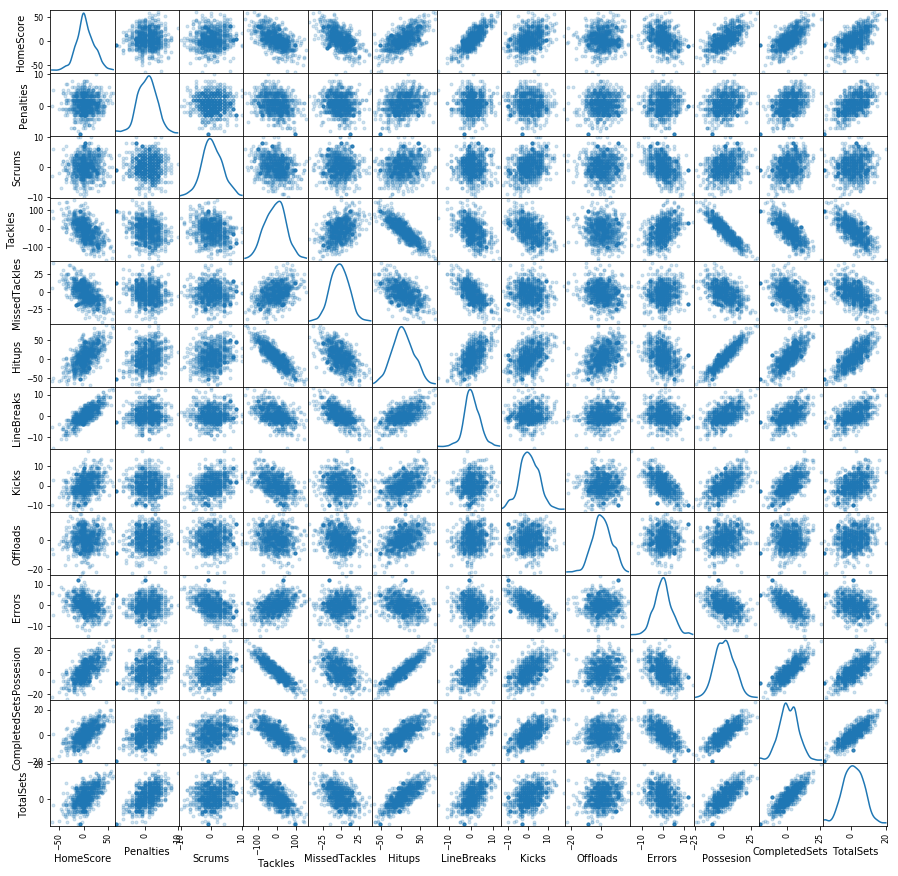

In [24]:
pandas.scatter_matrix(scoresnetsummary, alpha=0.2, figsize=(15, 15), diagonal='kde')

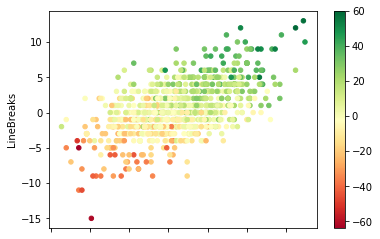

In [33]:
scoresnetsummary.plot.scatter(x="Hitups",y="LineBreaks", c=scoresnetsummary.HomeScore,
                        colormap=matplotlib.pyplot.cm.RdYlGn)
                             

In [34]:
ransac = sklearn.linear_model.RANSACRegressor()

In [36]:
X = scoresnetsummary[   ['MissedTackles','Hitups','LineBreaks','Kicks','Errors']    ]
y = scoresnetsummary.HomeScore

In [37]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_trials=100, min_samples=None,
        random_state=None, residual_metric=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [38]:
ransac.estimator_.coef_

array([-0.07042967,  0.16405283,  2.17173505,  0.2447002 , -0.61826884])

In [39]:
 ransac.estimator_.intercept_

0.56819945213047496

In [43]:
scorepredictions= ransac.predict(X)

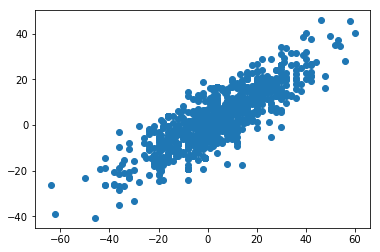

In [47]:
matplotlib.pyplot.scatter(scoresnetsummary.HomeScore, scorepredictions)